In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [6]:
#tf.keras.datasets.fashion_mnist.load_data()

In [7]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

In [8]:
# Imports components from Keras
from keras.models import Sequential
from keras.layers import Dense

# Initializes a sequential model
model = Sequential()

# First layer
model.add(Dense(10, activation='relu', input_shape=(784,)))

# Second layer
model.add(Dense(10, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

In [9]:
# Compile the model
model.compile(optimizer='adam', 
           loss='sparse_categorical_crossentropy', 
           metrics=['accuracy'])

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

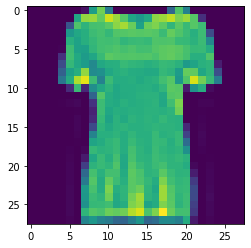

In [12]:
# pick a sample to plot
sample = 10
image = x_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image)
plt.show()

In [13]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
# Reshape the data to two-dimensional array
train_data = x_train.reshape((60000, 784))
train_labels = y_train
# Fit the model
model.fit(train_data, train_labels, validation_split=0.2, epochs=3)

Epoch 1/3
1500/1500 [==============================] - 8s 5ms/step - loss: 2.3504 - accuracy: 0.1443 - val_loss: 2.1710 - val_accuracy: 0.1488
Epoch 2/3
1500/1500 [==============================] - 7s 4ms/step - loss: 1.9863 - accuracy: 0.2010 - val_loss: 1.7568 - val_accuracy: 0.2654
Epoch 3/3
1500/1500 [==============================] - 7s 4ms/step - loss: 1.6954 - accuracy: 0.2707 - val_loss: 1.6642 - val_accuracy: 0.2842


In [15]:
# Reshape test data
test_data = x_test.reshape((10000,784))
test_labels = y_test

# Evaluate the model
model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.6584 - accuracy: 0.2894


[1.6583818197250366, 0.28940001130104065]

### Using Convolutions

### One dimensional convolutions

In [21]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Output array
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+3]).sum()

# Print conv
print(conv)

[ 1 -1  1 -1  1 -1  1 -1  0  0]


### Image convolutions

In [22]:
im = x_train[sample]

In [23]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(im.shape)

# Output array
for ii in range(im.shape[0] - 3):
    for jj in range(im.shape[1] - 3):
        result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()

# Print result
print(result)

[[0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.180e+02 5.510e+02 7.600e+02
  9.470e+02 1.028e+03 9.420e+02 8.500e+02 7.730e+02 6.680e+02 5.830e+02
  6.970e+02 7.870e+02 8.500e+02 9.060e+02 1.028e+03 8.940e+02 6.270e+02
  3.970e+02 3.400e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 6.600e+01 3.860e+02 7.220e+02 9.050e+02
  9.190e+02 9.250e+02 9.880e+02 1.024e+03 1.003e+03 9.030e+02 8.640e+02
  8.930e+02 9.930e+02 9.560e+02 9.750e+02 9.200e+02 9.410e+02 8.840e+02
  5.720e+02 2.340e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 1.350e+02 5.150e+02 7.800e+02 8.140e+02
  8.650e+02 8.840e+02 9.030e+02 9.340e+02 9.520e+02 9.350e+02 8.880e+02
  9.340e+02 9.420e+02 9.310e+02 9.070e+02 9.160e+02 8.630e+02 8.620e+02
  7.440e+02 3.540e+02 5.900e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 1.630e+02 6.180e+02 7.670e+02 7.820e+02
  8.510e+02 8.830e+02 8.860e+02 8.960e+02 8.880e+02 8.890e+02

### Implementing image convolutions in Keras

### Convolutional network for image classification

In [24]:
# Import the necessary components from Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
               input_shape=(28,28,1)))

# Flatten the output of the convolutional layer
model.add(Flatten())
# Add an output layer for the 3 categories
model.add(Dense(10, activation='softmax'))

In [25]:
# Compile the model 
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model on a training set
model.fit(x_train, y_train, 
          validation_split=.2, 
          epochs=3, batch_size=10)

Epoch 1/3
4800/4800 [==============================] - 28s 6ms/step - loss: 0.9010 - accuracy: 0.8226 - val_loss: 0.4102 - val_accuracy: 0.8550
Epoch 2/3
4800/4800 [==============================] - 29s 6ms/step - loss: 0.3697 - accuracy: 0.8679 - val_loss: 0.4225 - val_accuracy: 0.8560
Epoch 3/3
4800/4800 [==============================] - 29s 6ms/step - loss: 0.3278 - accuracy: 0.8806 - val_loss: 0.4350 - val_accuracy: 0.8626


In [26]:
# Evaluate the model on separate test data
model.evaluate(x_test,y_test, batch_size=10)

1000/1000 [==============================] - 4s 4ms/step - loss: 0.4569 - accuracy: 0.8563


[0.45686185359954834, 0.8562999963760376]

In [27]:
# Initialize the model
model1 = Sequential()

# Add the convolutional layer
model1.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(28,28,1), 
                 padding='same'))

# Feed into output layer
model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))

In [28]:
# Initialize the model
model2 = Sequential()

# Add the convolutional layer
model2.add(Conv2D(10, kernel_size=3, activation='relu', 
              input_shape=(28,28,1), 
              strides=2))

# Feed into output layer
model2.add(Flatten())
model2.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model 
model1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model on a training set
model1.fit(x_train, y_train, 
          validation_split=.2, 
          epochs=10, batch_size=10)

In [ ]:
# Compile the model 
model2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model on a training set
model2.fit(x_train, y_train, 
          validation_split=.2, 
          epochs=10, batch_size=10)

### Deep learning network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()

# Add a convolutional layer (15 units)
model.add(Conv2D(15, kernel_size=2, activation='relu', 
               input_shape=(28,28,1)))


# Add another convolutional layer (5 units)
model.add(Conv2D(5, kernel_size=2, activation='relu', 
               ))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model to training data 
model.fit(x_train, y_train, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

# Evaluate the model on test data
model.evaluate(x_test, y_test, batch_size=10)

### Pooling operations

In [37]:
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [30]:
import platform 
platform.python_version()

'3.8.8'

In [34]:
#!jupyter --version

In [42]:
model = Sequential()

In [43]:
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(28,28,1)))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 27, 27, 15)        75        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 15)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 5)         305       
                                                                 
 flatten_5 (Flatten)         (None, 720)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                7210      
                                                                 
Total params: 7,590
Trainable params: 7,590
Non-trainable params: 0
____________________________________________________

In [53]:
# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Fit to training data
model.fit(x_train, y_train, epochs=3, validation_split=.2, batch_size=10)

# Evaluate on test data 
model.evaluate(x_test,y_test,batch_size=10)

Epoch 1/3
4800/4800 [==============================] - 22s 5ms/step - loss: 0.2850 - accuracy: 0.8950 - val_loss: 0.3641 - val_accuracy: 0.8723
Epoch 2/3
4800/4800 [==============================] - 21s 4ms/step - loss: 0.2826 - accuracy: 0.8946 - val_loss: 0.3454 - val_accuracy: 0.8799
Epoch 3/3
1000/1000 [==============================] - 3s 2ms/step - loss: 0.3696 - accuracy: 0.8703


[0.3696213662624359, 0.8702999949455261]

### Improving Deep Convolutional Networks

In [52]:
from keras.callbacks import ModelCheckpoint

Epoch 1/3
4800/4800 [==============================] - 26s 5ms/step - loss: 0.2769 - accuracy: 0.8980 - val_loss: 0.3573 - val_accuracy: 0.8791
Epoch 2/3
4800/4800 [==============================] - 27s 6ms/step - loss: 0.2760 - accuracy: 0.8990 - val_loss: 0.3546 - val_accuracy: 0.8778
Epoch 3/3
4800/4800 [==============================] - 26s 5ms/step - loss: 0.2733 - accuracy: 0.8980 - val_loss: 0.3787 - val_accuracy: 0.8729


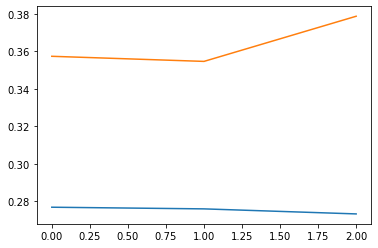

In [54]:
import matplotlib.pyplot as plt


# This checkpoint object will store the model parameters 
# in the file "weights.hdf5"
checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss',
                             save_best_only=True)


# Train the model and store the training object
training = model.fit(x_train, y_train, epochs=3, validation_split=.2, 
                     batch_size=10,callbacks=checkpoint)

# Extract the history from the training object
history = training.history

# Plot the training loss 
plt.plot(history['loss'])
# Plot the validation loss
plt.plot(history['val_loss'])

# Show the figure
plt.show()

In [55]:
# Load the weights from file
model.load_weights('weights.hdf5')

# Predict from the first three images in the test data
model.predict(x_test[:3])

1/1 [==============================] - 0s 154ms/step


array([[6.53528447e-12, 1.54705570e-15, 1.97289376e-17, 3.26585663e-17,
        2.85731200e-18, 4.14673013e-06, 2.63374942e-15, 1.99982896e-04,
        8.77647111e-09, 9.99795854e-01],
       [6.01104421e-06, 1.05261520e-11, 9.80118275e-01, 1.67510689e-06,
        5.88848488e-04, 7.67550411e-13, 1.92853045e-02, 4.61875651e-18,
        1.92672385e-08, 3.18672938e-15],
       [2.50636352e-11, 1.00000000e+00, 1.30912208e-13, 7.67774200e-09,
        6.19149487e-09, 5.21256697e-17, 4.64845731e-11, 7.79628894e-19,
        1.33728681e-13, 1.29243675e-14]], dtype=float32)

In [56]:
model.layers

### Interpreting the model

In [57]:
# Load the weights into the model
model.load_weights('weights.hdf5')

# Get the first convolutional layer from the model
c1 = model.layers[0]

# Get the weights of the first convolutional layer
weights1 = c1.get_weights()

# Pull out the first channel of the first kernel in the first layer
kernel = weights1[0][...,0, 0]
print(kernel)

[[-0.20860876 -0.06567431]
 [-0.01584157  0.05897301]]


In [60]:
def convolution(image, kernel):
    kernel = kernel - kernel.mean()
    result = np.zeros(image.shape)

    for ii in range(image.shape[0]-2):
        for jj in range(image.shape[1]-2):
            result[ii, jj] = np.sum(image[ii:ii+2, jj:jj+2] * kernel)

    return result

In [62]:
convolution

<function __main__.convolution(image, kernel)>

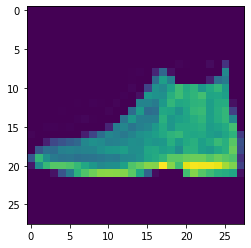

In [78]:
image = x_test[0]

# plot the sample
fig = plt.figure
plt.imshow(image)
plt.show()

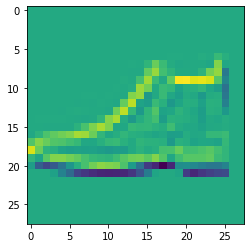

In [79]:
import matplotlib.pyplot as plt

# Convolve with the fourth image in test_data
out = convolution(x_test[0], kernel)

# Visualize the result
plt.imshow(out)
plt.show()